<a href="https://colab.research.google.com/github/junieberry/ML-PerfectGuide/blob/main/04.%20%EB%B6%84%EB%A5%98/02.%20%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01 분류의 개요

- 나이브 베이즈
- 로지스틱 회귀
- 의사 결정 트리
- 서포트 벡터 머신
- 최소 근접 알고리즘
- 심층 신경망
- 앙상블

주로 **앙상블**에 대해 다룸
1. 배깅 (Bagging)

    - 랜덤 포레스트
        
2. 부스팅 (Boosting)

    - 그래디언트 부스팅
        
        너무 느림
    - XgBoost
    - LightGBM

## 02 결정 트리

- 앙상블의 기본 알고리즘
- 쉽고 유연하며, 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 적음
- 규칙 구조가 복잡해 과적합이 발생할 수 있음
- 이러한 단점이 앙상블에서 장점으로 작용

<br>


---

<br>


- 데이터의 규칙을 자동으로 찾아네 트리 기반의 분류 규칙을 생성
- 트리의 depth가 깊어질수록 과적합 가능성
- 데이터를 분류할 때 최대한 많은 데이터 세트가 분류에 속하도록 규칙을 정해야함
- **어떻게 트리를 split할 것인가?**

<br>

---

<br>


**정보 균일도**
1. Information Gain (엔트로피)

    정보 이득이 높은 속성으로 분할
2. 지니 계수

    0이 가장 평등하고 1으로 갈 수록 불평등

---

1. `DecisionTreeClassifier`은 지니 계수가 낮은 조건을 찾아 분할
2. 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정

### 결정 트리 모델의 특징

장점|단점
---|---
- 쉽다| - 과적합 발생
- 피처 스케일링이나 정규화 등 사전 가공 영향도가 크지 않음|

### 결정 트리 파라미터

- `DecisionTreeClassifier` : 분류
- `DecisionTreeRegresso` : 회귀

---

- `min_samples_split`
    
    - 노드 분할 위한 최소 샘플 데이터 수
    - 데이터 수가 적은 노드는 찢지 않는다
    - 작게 설정하면 분할되는 노드가 많아져서 과적합 가능성 증가
    - 과적합 제어에 사용

- `min_samples_leaf`

    - 말단 노드가 되기 위한 최소한의 샘플 데이터 수
    - 커질 수록 더 러프하게 구분하게 됨
    - 비대칭적 데이터는 데이터가 적을 수 있어 주의 필요
    - 과적합 제어에 사용

- `max_features`

    - 최적의 분할을 위해 고려할 최대 피처 개수
    - 디폴트는 None
    - int면 피쳐 개수, float이면 피처의 퍼센트

- `max_depth`

    - 트리의 최대 깊이
- `max_leaf_nodes`

    - 말단 노드의 최대 개수

### 결정 트리 모델의 시각화

`Graphviz` 채키지 사용

In [1]:
## using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

## 학습
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz는 Graphviz가 읽을 수 있는 출력 파일 생성
## estimator, output 파일 명, 결정 클래스 명칭, 피쳐 명칭
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

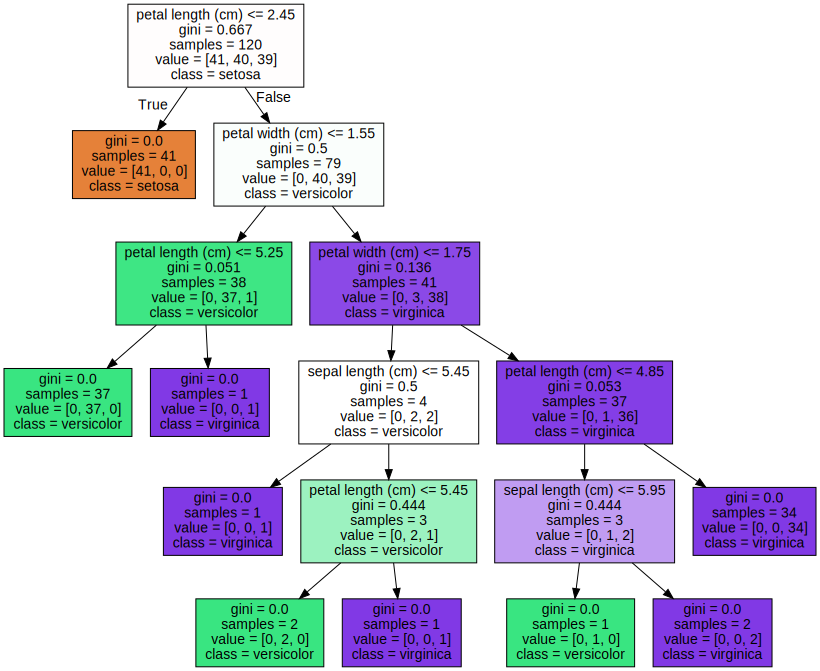

In [5]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

결정 트리는 몇 개의 피처가 규칙 트리에 크게 영향
- `feature_importances_` 속성으로 피처 중요도 제공

sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


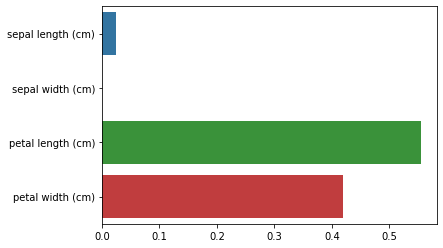

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

## feature importance

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(name, value)

sns.barplot(x=dt_clf.feature_importances_, y =iris_data.feature_names)

### 결정 트리 과적합

[scatter 컨닝페이퍼](https://wikidocs.net/92110)

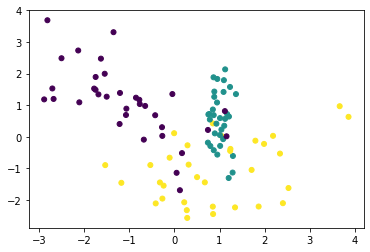

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

## 피처는 두개, 클래스는 세개
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(x=x_features[:,0], y=x_features[:,1], marker='o', c=y_labels, s=25)

In [8]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


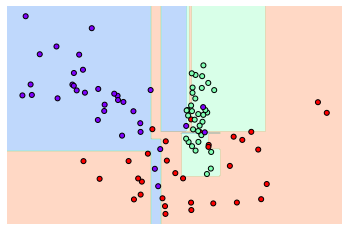

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

이상치까지 분류해서 경계가 많아짐

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


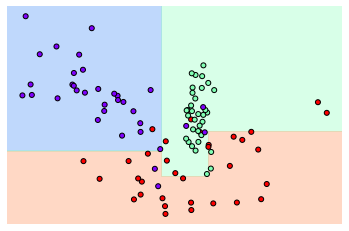

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

#### 데이터 가져오기

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 하나 이상의 공백
feature_name_df = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

print(feature_name_df.head())

feature_name = feature_name_df.iloc[:, 1].values.tolist()
print(feature_name[:10])

   column_index        column_name
0             1  tBodyAcc-mean()-X
1             2  tBodyAcc-mean()-Y
2             3  tBodyAcc-mean()-Z
3             4   tBodyAcc-std()-X
4             5   tBodyAcc-std()-Y
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [18]:
## 중복 피쳐명 제거

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())

column_index    42
dtype: int64


In [ ]:
# 중복된 feature 이름 변경
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    
    feature_dup_df = feature_dup_df.reset_index()
    print(feature_dup_df)
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [27]:
import pandas as pd

def get_human_dataset():

    # 공백으로 구분
    feature_name_df = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복된 피처명 수정
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # Dataframe한테 피처명 칼럼으로 주기 위해서 리스트로 변경
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 피처 데이터 세트링 라벨 데이터 세트
    x_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    x_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 반환
    return x_train, x_test, y_train, y_test


x_train, x_test, y_train, y_test = get_human_dataset()

     index  dup_cnt
0        0        0
1        1        0
2        2        0
3        3        0
4        4        0
..     ...      ...
556    556        0
557    557        0
558    558        0
559    559        0
560    560        0

[561 rows x 2 columns]
     index  column_index                           column_name  dup_cnt
0        0             1                     tBodyAcc-mean()-X        0
1        1             2                     tBodyAcc-mean()-Y        0
2        2             3                     tBodyAcc-mean()-Z        0
3        3             4                      tBodyAcc-std()-X        0
4        4             5                      tBodyAcc-std()-Y        0
..     ...           ...                                   ...      ...
556    556           557      angle(tBodyGyroMean,gravityMean)        0
557    557           558  angle(tBodyGyroJerkMean,gravityMean)        0
558    558           559                  angle(X,gravityMean)        0
559    559      

#### 데이터 관찰

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [32]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

#### 분류

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train , y_train)
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test , pred)
print('정확도: ', accuracy)

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('하이퍼 파라미터:\n', dt_clf.get_params())

정확도:  0.8547675602307431
하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


#### 트리 깊이가 예측 정확도에 주는 영향

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}


grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(x_train , y_train)
print('최고 평균 정확도 수치:',grid_cv.best_score_)
print('최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
최고 평균 정확도 수치: 0.8513444970102249
최적 하이퍼 파라미터: {'max_depth': 16}


In [40]:
print(grid_cv.cv_results_['param_max_depth'])
print(grid_cv.cv_results_['mean_test_score'])

[6 8 10 12 16 20 24]
[0.85079094 0.85106934 0.851209   0.844135   0.8513445  0.85079982
 0.8494402 ]


#### max_depth + min_samples_split

In [42]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(x_train , y_train)
print('최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
최고 평균 정확도 수치: 0.8549
최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [44]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(x_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


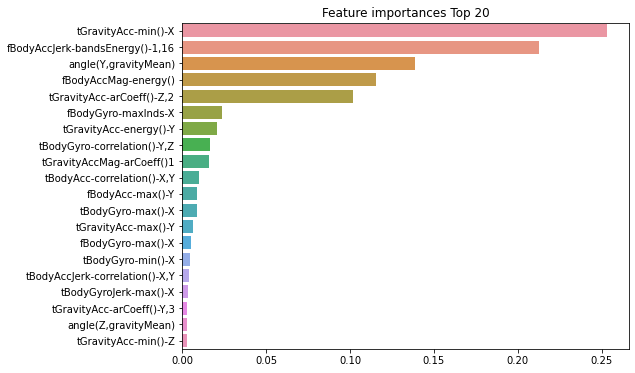

In [45]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()